In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from scipy.interpolate import interp1d
from matplotlib.patches import Rectangle

# Parameters

In [2]:
# === Parameters ===
g = 980.665  # Gravitational acceleration
gamma = 5e-10  # Microorganism density ratio 
H = 1.98  # Domain Height
theta = 0.01  # Diffusion rate of microorganisms
nu = 0.01  # Kinematic viscosity
con = 1e+4  # Average cell concentration
Wc = 0.01  # Upward swimming velocity

# === Non-dimensional Parameter ===
Pe = Wc * H / theta  # Peclet number

# Function Value Approximation

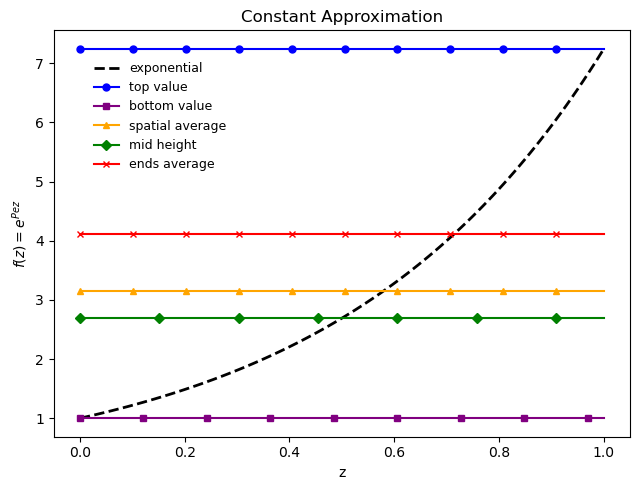

In [3]:
# === Define Function ===
z = np.linspace(0, 1, 100)
original = np.exp(Pe * z)

# === Approximations ===
app_top = np.ones_like(z) * np.exp(Pe)
app_bottom = np.ones_like(z)
app_spatial_avg = np.ones_like(z) * (np.exp(Pe)-1)/Pe
app_mid_height = np.ones_like(z) * np.exp(Pe/2)
app_ends_avg = np.ones_like(z) * (np.exp(Pe)+1)/2

# === Plot ===
plt.figure(figsize=(6.5,5))
plt.plot(z, original, '--', color='black', linewidth=2, label='exponential')

plt.plot(z, app_top, '-o', color='blue', markersize=5, markevery=10, label='top value')
plt.plot(z, app_bottom, '-s', color='purple', markersize=5, markevery=12, label='bottom value')
plt.plot(z, app_spatial_avg, '-^', color='orange', markersize=5, markevery=10, label='spatial average')
plt.plot(z, app_mid_height, '-D', color='green', markersize=5, markevery=15, label='mid height')
plt.plot(z, app_ends_avg, '-x', color='red', markersize=5, markevery=10, label='ends average')

plt.xlabel('z')
plt.ylabel(r'$f(z) = e^{Pe z}$')
plt.title('Constant Approximation')
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95), frameon=False, fontsize=9)
plt.tight_layout()
plt.savefig("../figures/Constant_Approximation.pdf", dpi=300, bbox_inches="tight")
plt.show()

# Bioconvection Rayleigh Number

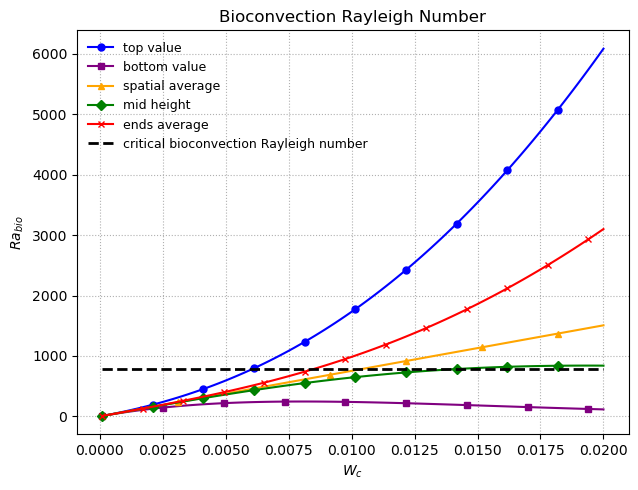

In [4]:
# === Define variable ===
Wc_Rayleigh = np.linspace(0.0001, 0.02, 100)

# === Calculate Bioconvection Rayleigh number ===
Pe_Rayleigh = Wc_Rayleigh * H / theta
fric = gamma * g * H**3 * con * Pe_Rayleigh**2 / (nu * theta * (np.exp(Pe_Rayleigh)-1))
R_top = np.exp(Pe_Rayleigh) * fric
R_bottom = np.ones_like(Pe_Rayleigh) * fric
R_spatial_avg = (np.exp(Pe_Rayleigh)-1)/Pe_Rayleigh * fric
R_mid_height = np.exp(Pe_Rayleigh/2) * fric
R_ends_avg = (np.exp(Pe_Rayleigh)+1)/2 * fric

R_bio_critical = 8 * (np.pi**4) * np.ones_like(Pe_Rayleigh)

# === Plot ===
x = Wc_Rayleigh
plt.figure(figsize=(6.5,5))
plt.plot(x, R_top, '-o', color='blue', markersize=5, markevery=10, label='top value')
plt.plot(x, R_bottom, '-s', color='purple', markersize=5, markevery=12, label='bottom value')
plt.plot(x, R_spatial_avg, '-^', color='orange', markersize=5, markevery=15, label='spatial average')
plt.plot(x, R_mid_height, '-D', color='green', markersize=5, markevery=10, label='mid height')
plt.plot(x, R_ends_avg, '-x', color='red', markersize=5, markevery=8, label='ends average')
# Critical line
plt.plot(x, R_bio_critical, '--', color='black', linewidth=2,
         label='critical bioconvection Rayleigh number')

plt.xlabel(r'$W_c$')
plt.ylabel(r'$Ra_{bio}$')
plt.title('Bioconvection Rayleigh Number')
plt.legend(frameon=False, fontsize=9)
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("../figures/Rayleigh_Wc.pdf", dpi=300, bbox_inches="tight")
plt.show()

# H-Wc Plot

In [5]:
def stability_condition(H,Wc):
    Pe = Wc * H / theta
    fric = gamma * g * H**3 * con * Pe**2 / (nu * theta * (np.exp(Pe)-1))


    top = np.exp(Pe) * fric -  8 * (np.pi**4)
    bottom = np.ones_like(Pe) * fric -  8 * (np.pi**4)
    spatial_avg = (np.exp(Pe)-1)/Pe * fric - 8 * (np.pi**4)
    mid_height = np.exp(Pe/2) * fric - 8 * (np.pi**4)
    ends_avg = (np.exp(Pe)+1)/2 * fric - 8 * (np.pi**4)

    stability_condition = np.array([top, bottom, spatial_avg, mid_height, ends_avg])
    return stability_condition

In [6]:
def critical_Wc(H,Wc):
    Wc_critical_top = np.ones_like(H) * (Wc[-1]+0.001)
    Wc_critical_bottom = np.ones_like(H) * (Wc[-1]+0.001)
    Wc_critical_spatial_avg = np.ones_like(H) * (Wc[-1]+0.001)
    Wc_critical_mid_height = np.ones_like(H) * (Wc[-1]+0.001)
    Wc_critical_ends_avg = np.ones_like(H) * (Wc[-1]+0.001)

    for i in range(len(H)):
        top = stability_condition(H[i],Wc)[0]
        bottom = stability_condition(H[i],Wc)[1]
        spatial_avg = stability_condition(H[i],Wc)[2]
        mid_height = stability_condition(H[i],Wc)[3]
        ends_avg = stability_condition(H[i],Wc)[4]

        for j in range(len(Wc)):
            if top[j] >= 0:
              Wc_critical_top[i] = (Wc[j]+Wc[j-1])/2
              break

        for j in range(len(Wc)):
            if bottom[j] >= 0:
              Wc_critical_bottom[i] = (Wc[j]+Wc[j-1])/2
              break

        for j in range(len(Wc)):
            if spatial_avg[j] >= 0:
              Wc_critical_spatial_avg[i] = (Wc[j]+Wc[j-1])/2
              break

        for j in range(len(Wc)):
            if mid_height[j] >= 0:
              Wc_critical_mid_height[i] = (Wc[j]+Wc[j-1])/2
              break

        for j in range(len(Wc)):
            if ends_avg[j] >= 0:
              Wc_critical_ends_avg[i] = (Wc[j]+Wc[j-1])/2
              break

    Wc_critical = np.array([Wc_critical_top, Wc_critical_bottom, Wc_critical_spatial_avg, Wc_critical_mid_height, Wc_critical_ends_avg])
    return Wc_critical

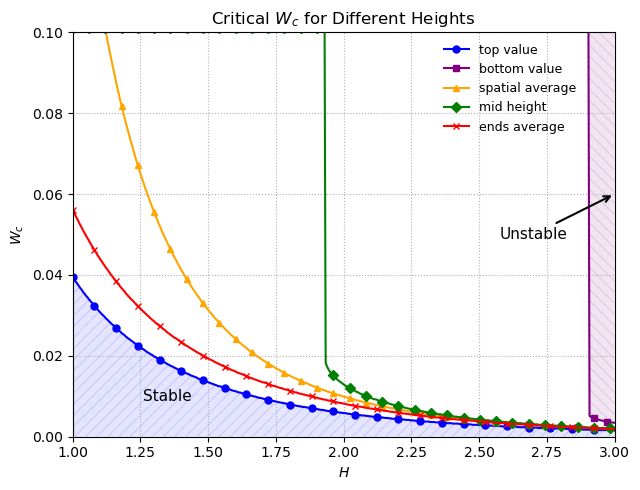

In [7]:
H_numerical = np.linspace(1,3,500)
Wc_numerical = np.linspace(0.0001,0.1,1000)
critical_values = critical_Wc(H_numerical,Wc_numerical)
Wc_critical_top = critical_values[0]
Wc_critical_bottom = critical_values[1]
Wc_critical_spatial_avg = critical_values[2]
Wc_critical_mid_height = critical_values[3]
Wc_critical_ends_avg = critical_values[4]

fig, ax = plt.subplots(figsize=(6.5,5))

ax.plot(H_numerical, Wc_critical_top, '-o', color='blue', markersize=5, markevery=20, label='top value')
ax.plot(H_numerical, Wc_critical_bottom, '-s', color='purple', markersize=5, markevery=12, label='bottom value')
ax.plot(H_numerical, Wc_critical_spatial_avg, '-^', color='orange', markersize=5, markevery=15, label='spatial average')
ax.plot(H_numerical, Wc_critical_mid_height, '-D', color='green', markersize=5, markevery=15, label='mid height')
ax.plot(H_numerical, Wc_critical_ends_avg, '-x', color='red', markersize=5, markevery=20, label='ends average')

ax.fill_between(H_numerical, Wc_critical_top, 0, color='blue', alpha=0.1, hatch='///', edgecolor='blue', linewidth=0.0)
ax.fill_between(H_numerical, Wc_critical_bottom, Wc_numerical[-1], color='purple', alpha=0.1, hatch='\\\\\\', edgecolor='purple', linewidth=0.0)

ax.text(0.45*H_numerical[-1], 0.1*Wc_numerical[-1], "Stable", fontsize=11, ha='center', va='center')
ax.annotate("Unstable",
            xy=(H_numerical[-1], 0.6*Wc_numerical[-1]),xycoords='data',
            xytext=(0.9*H_numerical[-1], 0.5*Wc_numerical[-1]), textcoords='data',
            arrowprops=dict(arrowstyle="->", lw=1.5),
            ha='center', va='center', fontsize=11)

ax.set_ylim(0, Wc_numerical[-1])
ax.set_xlim(1, 3)
ax.set_xlabel(r'$H$')
ax.set_ylabel(r'$W_c$')
ax.set_title('Critical $W_c$ for Different Heights')

ax.legend(loc='upper right', bbox_to_anchor=(0.95, 1), fontsize=9, frameon=False)
ax.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("../figures/Wc_H.pdf", dpi=300, bbox_inches="tight")
plt.show()

# Numerical Results

/var/folders/h3/k8ll1w1x5_l3jgcdp3flfyd40000gr/T/ipykernel_9527/4225470448.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


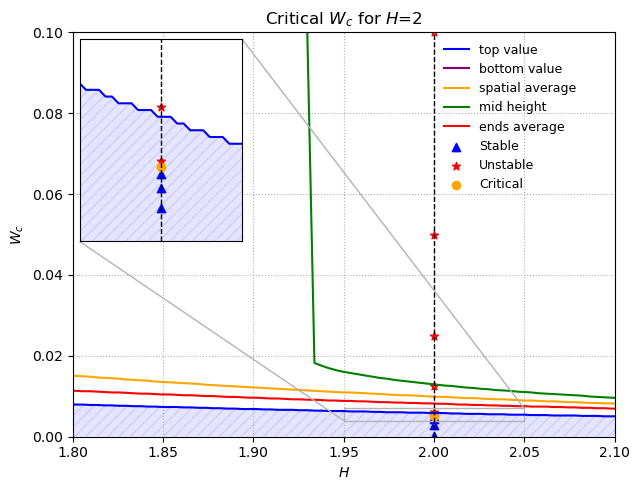

In [12]:
file_path = '../data/H11.csv'
numerical_results = pd.read_csv(file_path)

H_simulation = numerical_results['H'].values
Wc_simulation = numerical_results['W'].values
Stability_numerical = numerical_results['Results']

category_conditions = [
    (Stability_numerical == 'S'),
    (Stability_numerical == 'U'),
    (Stability_numerical == 'C')
]
category_labels = ['Stable', 'Unstable', 'Critical']
numerical_results['Category'] = np.select(category_conditions, category_labels, default='Other')
filter_results = numerical_results[numerical_results['Category'].isin(category_labels)]

category_style = {
    "Stable": {"marker": "^", "color": "blue"},
    "Unstable": {"marker": "*", "color": "red"},
    "Critical":{"marker": "o", "color": "orange"}
}

fig, ax = plt.subplots(figsize=(6.5,5))
axins = inset_axes(ax, width="30%", height="50%", loc="upper left")

ax.plot(H_numerical, Wc_critical_top, '-', color='blue', markersize=5, markevery=20, label='top value')
ax.plot(H_numerical, Wc_critical_bottom, '-', color='purple', markersize=5, markevery=12, label='bottom value')
ax.plot(H_numerical, Wc_critical_spatial_avg, '-', color='orange', markersize=5, markevery=15, label='spatial average')
ax.plot(H_numerical, Wc_critical_mid_height, '-', color='green', markersize=5, markevery=15, label='mid height')
ax.plot(H_numerical, Wc_critical_ends_avg, '-', color='red', markersize=5, markevery=20, label='ends average')
ax.axvline(x=2, linestyle='--', linewidth=1, color='black')
ax.fill_between(H_numerical, Wc_critical_top, 0, color='blue', alpha=0.1, hatch='///', edgecolor='blue', linewidth=0.0)
ax.fill_between(H_numerical, Wc_critical_bottom, Wc_numerical[-1], color='purple', alpha=0.1, hatch='\\\\\\', edgecolor='purple', linewidth=0.0)

axins.plot(H_numerical, Wc_critical_top, '-', color='blue', markersize=5, markevery=20, label='top value')
axins.plot(H_numerical, Wc_critical_bottom, '-', color='purple', markersize=5, markevery=12, label='bottom value')
axins.plot(H_numerical, Wc_critical_spatial_avg, '-', color='orange', markersize=5, markevery=15, label='spatial average')
axins.plot(H_numerical, Wc_critical_mid_height, '-', color='green', markersize=5, markevery=15, label='mid height')
axins.plot(H_numerical, Wc_critical_ends_avg, '-', color='red', markersize=5, markevery=20, label='ends average')
axins.axvline(x=2, linestyle='--', linewidth=1, color='black')
axins.fill_between(H_numerical, Wc_critical_top, 0, color='blue', alpha=0.1, hatch='///', edgecolor='blue', linewidth=0.0)


for category, style in category_style.items():
    category_data = filter_results[filter_results['Category'] == category]
    ax.scatter(
        category_data['H'],
        category_data['W'],
        marker=style["marker"],
        color=style["color"],
        label=category,
    )
    axins.scatter(
        category_data['H'],
        category_data['W'],
        marker=style["marker"],
        color=style["color"],
        label=category,
    )

ax.set_ylim(0, Wc_numerical[-1])
#ax.set_ylim(0,0.01)
ax.set_xlim(1.8, 2.1)
ax.set_xlabel(r'$H$')
ax.set_ylabel(r'$W_c$')
ax.set_title('Critical $W_c$ for $H$=2')

axins.set_ylim(0.004, 0.007)
axins.set_xlim(1.95, 2.05)
axins.set_xticks([])
axins.set_yticks([])

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.7")

ax.legend(loc='upper right', bbox_to_anchor=(0.95, 1), fontsize=9, frameon=False)
ax.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("../figures/H11.pdf", dpi=300, bbox_inches="tight")
plt.show()

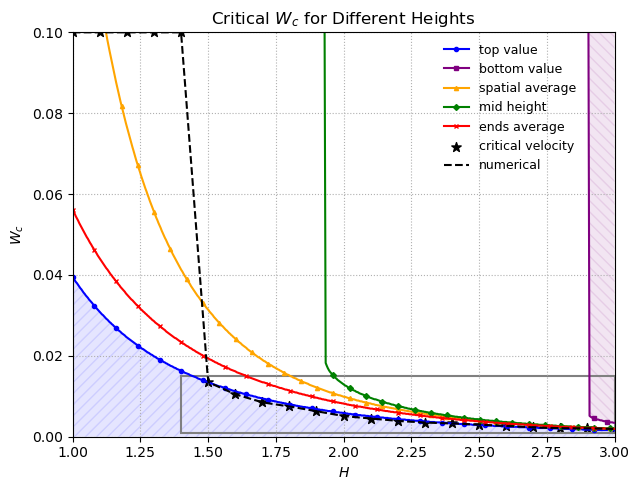

In [13]:
file_path = "../data/Critical.csv"
numerical_results = pd.read_csv(file_path)
numerical_results = numerical_results.dropna()

H_simulation = numerical_results['Height'].values
Wc_simulation = numerical_results['Velocity'].values
Wc_critical = interp1d(H_simulation, Wc_simulation, kind='linear')

fig, ax = plt.subplots(figsize=(6.5,5))

ax.plot(H_numerical, Wc_critical_top, '-o', color='blue', markersize=3, markevery=20, label='top value')
ax.plot(H_numerical, Wc_critical_bottom, '-s', color='purple', markersize=3, markevery=12, label='bottom value')
ax.plot(H_numerical, Wc_critical_spatial_avg, '-^', color='orange', markersize=3, markevery=15, label='spatial average')
ax.plot(H_numerical, Wc_critical_mid_height, '-D', color='green', markersize=3, markevery=15, label='mid height')
ax.plot(H_numerical, Wc_critical_ends_avg, '-x', color='red', markersize=3, markevery=20, label='ends average')
ax.fill_between(H_numerical, Wc_critical_top, 0, color='blue', alpha=0.1, hatch='///', edgecolor='blue', linewidth=0.0)
ax.fill_between(H_numerical, Wc_critical_bottom, Wc_numerical[-1], color='purple', alpha=0.1, hatch='\\\\\\', edgecolor='purple', linewidth=0.0)
ax.scatter(H_simulation, Wc_simulation, marker='*', color='black', s=50, label='critical velocity')
ax.plot(H_numerical, Wc_critical(H_numerical), '--', color = 'black', label='numerical')

ax.set_ylim(0,0.1)
ax.set_xlim(1, 3)
ax.set_xlabel(r'$H$')
ax.set_ylabel(r'$W_c$')
ax.set_title('Critical $W_c$ for Different Heights')

rect = Rectangle( (1.4, 0.001), 1.6, 0.014, fill=False, linewidth=1.5, linestyle='-', edgecolor='gray')
ax.add_patch(rect)

ax.legend(loc='upper right', bbox_to_anchor=(0.95, 1), fontsize=9, frameon=False)
ax.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("../figures/Numerical.pdf", dpi=300, bbox_inches="tight")
plt.show()

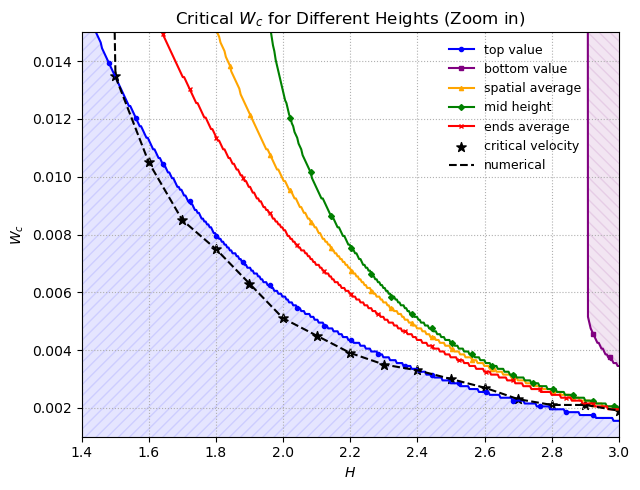

In [14]:
fig, ax = plt.subplots(figsize=(6.5,5))

ax.plot(H_numerical, Wc_critical_top, '-o', color='blue', markersize=3, markevery=20, label='top value')
ax.plot(H_numerical, Wc_critical_bottom, '-s', color='purple', markersize=3, markevery=12, label='bottom value')
ax.plot(H_numerical, Wc_critical_spatial_avg, '-^', color='orange', markersize=3, markevery=15, label='spatial average')
ax.plot(H_numerical, Wc_critical_mid_height, '-D', color='green', markersize=3, markevery=15, label='mid height')
ax.plot(H_numerical, Wc_critical_ends_avg, '-x', color='red', markersize=3, markevery=20, label='ends average')
ax.fill_between(H_numerical, Wc_critical_top, 0, color='blue', alpha=0.1, hatch='///', edgecolor='blue', linewidth=0.0)
ax.fill_between(H_numerical, Wc_critical_bottom, Wc_numerical[-1], color='purple', alpha=0.1, hatch='\\\\\\', edgecolor='purple', linewidth=0.0)
ax.scatter(H_simulation, Wc_simulation, marker='*', color='black', s=50, label='critical velocity')
ax.plot(H_numerical, Wc_critical(H_numerical), '--', color = 'black', label='numerical')

ax.set_ylim(0.001,0.015)
ax.set_xlim(1.4, 3)
ax.set_xlabel(r'$H$')
ax.set_ylabel(r'$W_c$')
ax.set_title('Critical $W_c$ for Different Heights (Zoom in)')

ax.legend(loc='upper right', bbox_to_anchor=(0.95, 1), fontsize=9, frameon=False)
ax.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("../figures/Numerical_zoomin.pdf", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/h3/k8ll1w1x5_l3jgcdp3flfyd40000gr/T/ipykernel_9527/4243368054.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


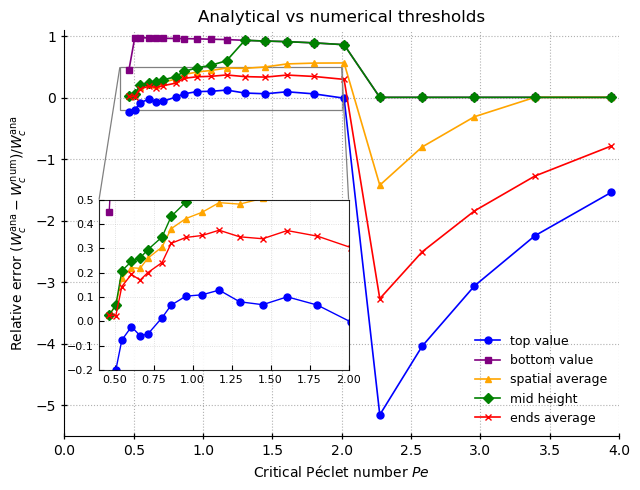

In [15]:
# --- data prep ---
crit = critical_Wc(H_simulation, Wc_numerical)  # [top, bottom, spatial_avg, mid, ends_avg]
Wc_top, Wc_bot, Wc_spa, Wc_mid, Wc_end = crit
Pe = Wc_top * H_simulation / theta

def rel_err(wc):
    return (wc - Wc_simulation) / wc


series = [
    ("top value",          rel_err(Wc_top), 'o', 'blue'),
    ("bottom value",       rel_err(Wc_bot), 's', 'purple'),
    ("spatial average",    rel_err(Wc_spa), '^', 'orange'),
    ("mid height",         rel_err(Wc_mid), 'D', 'green'),
    ("ends average",       rel_err(Wc_end), 'x', 'red'),
]

# --- figure ---
fig, ax = plt.subplots(figsize=(6.5, 5))

# main lines
for label, yvals, mk, c in series:
    ax.plot(Pe, yvals, '-'+mk, color=c, markersize=5, linewidth=1.2, label=label)

ax.set_xlim(0, 4)
ax.set_ylim(-5.5, 1.1)
ax.set_xlabel(r'Critical Péclet number $Pe$')
ax.set_ylabel(r'Relative error $(W_c^{\rm ana}-W_c^{\rm num})/W_c^{\rm ana}$')
ax.set_title('Analytical vs numerical thresholds')

# subtle main styling
ax.grid(True, linestyle=':')
ax.tick_params(direction='inout', length=5, width=0.9)
for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)

# --- inset (zoom) ---
# Place cleanly inside the axes without overlapping labels/legend
axins = inset_axes(
    ax, width="45%", height="42%",
    loc="upper left",
    bbox_to_anchor=(0.05, -0.4, 1, 1),  # (x, y, w, h) in axes coords
    bbox_transform=ax.transAxes
)

# plot same series in inset
for label, yvals, mk, c in series:
    axins.plot(Pe, yvals, '-'+mk, color=c, markersize=5, linewidth=1.0)

# zoom window: adjust to your interesting region
axins.set_xlim(0.4, 2.0)
axins.set_ylim(-0.20, 0.50)

# keep numbers on the inset axes and keep them readable
axins.tick_params(axis='both', which='both', direction='in', labelsize=8)


# light grid/tone so the inset blends in
axins.grid(True, linestyle=':', linewidth=0.6, alpha=0.5)
axins.set_facecolor((1, 1, 1, 0.92))
for s in axins.spines.values():
    s.set_linewidth(0.8)
    s.set_alpha(0.85)

# neat, unobtrusive connectors
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5", lw=0.9)

# legend kept off the inset and away from labels
ax.legend(loc='lower right', fontsize=9, frameon=False)

fig.tight_layout()
plt.savefig("../figures/Comparison.pdf", dpi=300, bbox_inches="tight")
plt.show()
